In [7]:
set.seed(42)

In [46]:
install.packages("ggplot2")
library(ggplot2)
install.packages("ellipse")
library(ellipse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [19]:
children_data <- read.table("WeightLength.txt", header=TRUE)

In [25]:
means <- colMeans(children_data)
means

Weight     Length 
3233.54511   49.23764

In [39]:
covariance <- cov(children_data)
covariance

,Weight,Length
Weight,220276.6577,915.295511
Length,915.2955,4.443303


In [35]:
cor(children_data)

,Weight,Length
Weight,1.0000000,0.9251755
Length,0.9251755,1.0000000


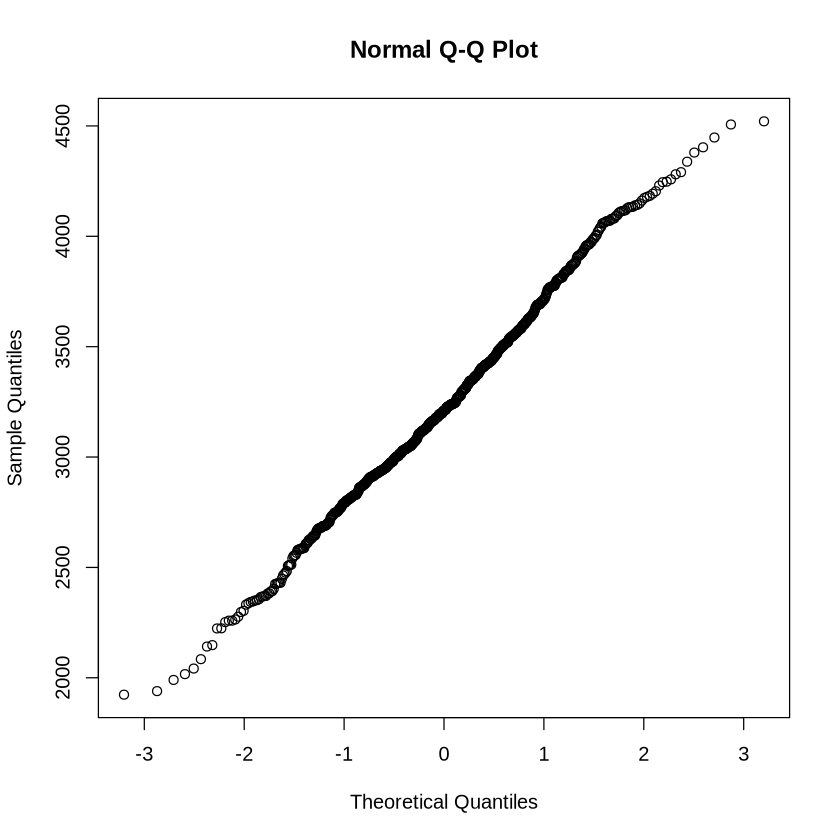

In [30]:
qqnorm(children_data[["Weight"]])

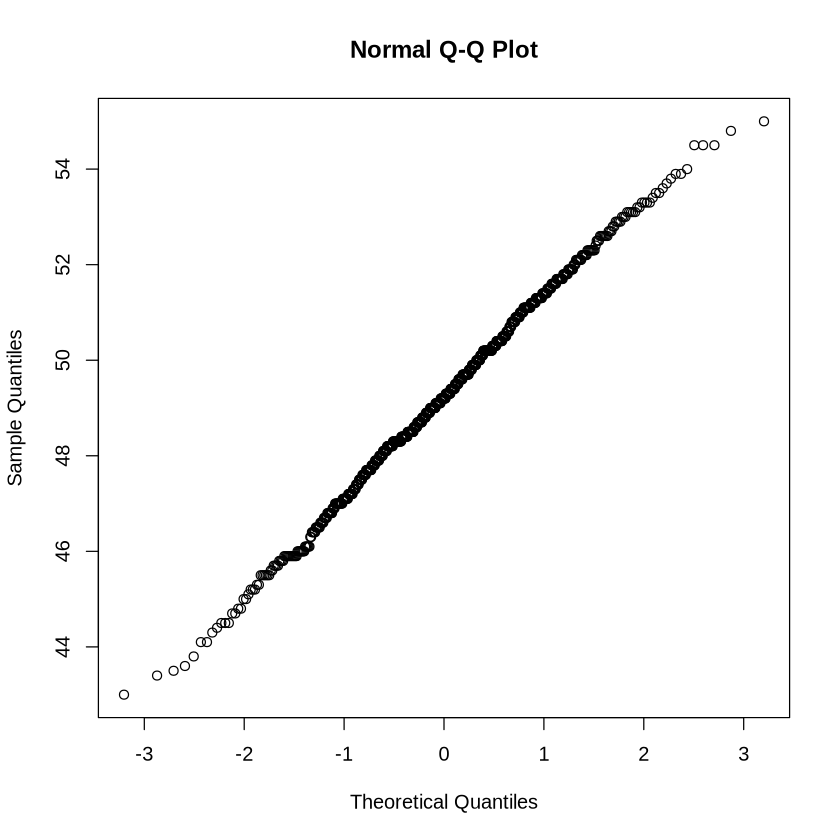

In [33]:
qqnorm(children_data[["Length"]])

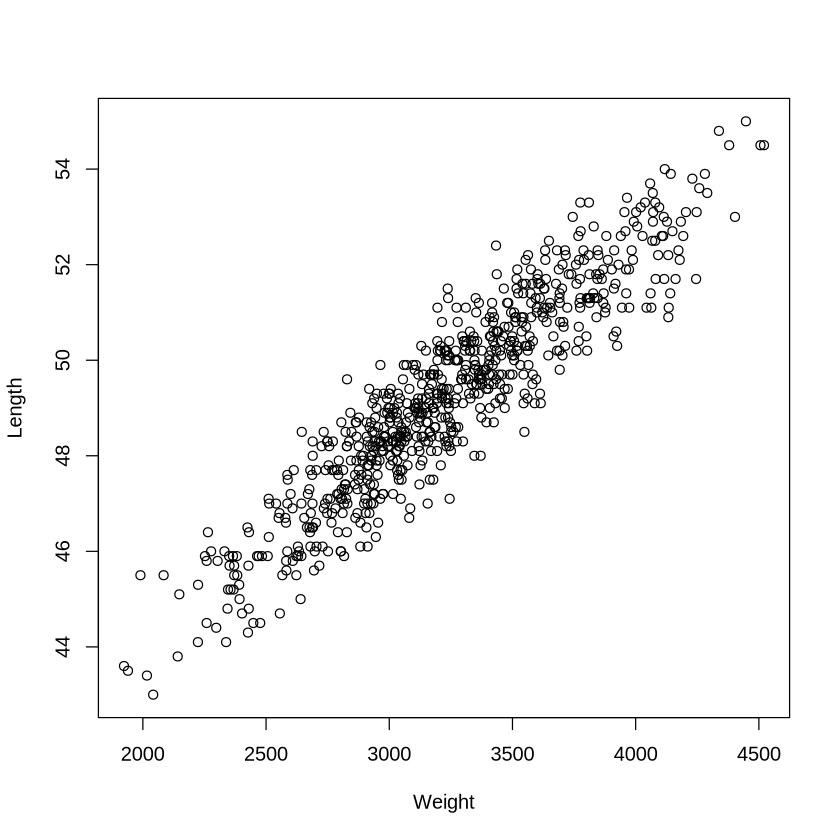

In [34]:
plot(children_data)

In [47]:
library(ellipse)
# sigma: covariance matrix, mu: mean vector, level: probability 
ellipse_data = ellipse(x = covariance, centre = means, level = 0.95)
ellipse_data = as.data.frame(ellipse_data)
ellipse_data

Weight,Length
<dbl>,<dbl>
4360.667,54.29984
4344.305,54.35294
4323.469,54.38545
4298.246,54.39723
4268.735,54.38823
4235.055,54.35850
4197.343,54.30814
4155.750,54.23737
4110.444,54.14646


In [50]:
ggplot(ellipse_data,
       aes(children_data["Weight"], children_data["Length"])) +
  geom_path() +
  theme_bw()

Don't know how to automatically pick scale for object of type <data.frame>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <data.frame>. Defaulting to continuous.
Warning message in geom_path():
“All aesthetics have length 1, but the data has 100 rows.
ℹ Did you mean to use `annotate()`?”
ERROR while rich displaying an object: Error in `geom_path()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `data_frame()`:
! Can't recycle `x` (size 736) to match `PANEL` (size 100).

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parent